In [36]:
import numpy as np
import pandas as pd
from scipy.stats import binom, beta, gamma, poisson, norm
from scipy.optimize import minimize
from numpy.random import default_rng
import matplotlib.pyplot as plt

Note:  To match gamma parameterization i book,  use gamma(s, scale = 1/r)

### Exercise 5.5:

Let random variable $\lambda$ represent the rate of text messages people receive in an hour. At first, you believe that the typical number of messages per hour is 5 with a standard deviation of 0.25 messages.
Tune and plot an appropriate Gamma  prior model for  $\lambda$.
 
What is the prior probability that the rate of text messages per hour is larger than 10? 

Recall mean = s/r,  var = s/r^2 .   
so $s/r = 5$ and $s/r^2 = 0.25^2$

Lets solve this general:

$s = \mu r$
$\mu / r = \sigma^2$

implies 

$r = \mu/\sigma^2$ and $s = \mu^2/\sigma^2$

In [13]:
.25**2

0.0625

s = 400.0, r = 80.0
(array(5.), array(0.0625))
Probability of rate > 10 is 0.0


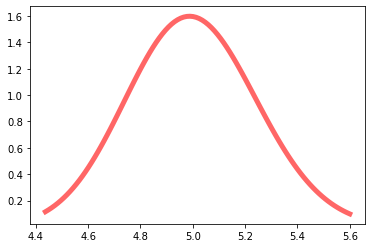

In [20]:
fig, ax = plt.subplots(1, 1)
r = 5.0/0.25**2
s = 5.0*r 
print(f"s = {s}, r = {r}")
rv = gamma(s, scale = 1/r)
print(rv.stats(moments="mv"))
x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)
ax.plot(x, rv.pdf(x),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
print(f"Probability of rate > 10 is {1.0-rv.cdf(10.0)}")

### Exercise 5.6 
Continuing with Exercise 5.5, you collect data from six friends. They received 7, 3, 8, 9, 10, 12 text messages in the previous hour.
Plot the resulting likelihood function 

Plot the   posterior pdf  and summary statistics.
 
Comment on how your understanding about   $\lambda$ changed from the prior (in the previous exercise) to the posterior based on the data you collected from your friends.

In [22]:
totalMessages = 7+3+8+9+10+12
numTest = 6

In [27]:
np.exp(4.*numTest)

26489122129.84347

recall that the likely hood is $L \propto \lambda^{\sum{y_i}}e^{-n\lambda}$


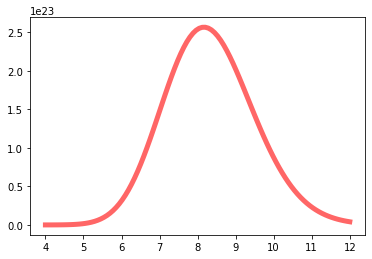

In [29]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(4., 12., 100)
ax.plot(x, np.exp(-numTest*x)*x**totalMessages,
       'r-', lw=5, alpha=0.6, label='Likelhood')
 

And the posterior is given by:

In [31]:
post_s = s + totalMessages
post_r = r + numTest

Mean: 5.220930232558139, std: 0.24639093140019871
Probability of rate > 10 is now 0.0


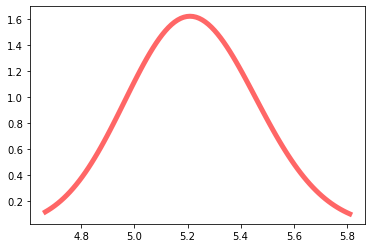

In [35]:
fig, ax = plt.subplots(1, 1)
rv = gamma(post_s, scale = 1/post_r)
(mean, var) = rv.stats(moments="mv")
print(f"Mean: {mean}, std: {np.sqrt(var)}")
x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)
ax.plot(x, rv.pdf(x),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
print(f"Probability of rate > 10 is now {1.0-rv.cdf(10.0)}")

Note that the very tight prior ($\sigma = 0.25$) really means the data was not anywhere near enough! Almost no change from prior.

### Exercise 5.9 (Investing in stock)

You just bought stock in FancyTech. Let random variable  μ  be the average dollar amount that your FancyTech stock goes up or down in a one-day period. At first, you believe that  μ  is 7.2 dollars with a standard deviation of 2.6 dollars. Tune and plot an appropriate Normal prior model for  μ.

According to your plot, does it seem plausible that the FancyTech stock would increase by an average of 7.6 dollars in a day?

Does it seem plausible that the FancyTech stock would increase by an average of 4 dollars in a day?

What is the prior probability that, on average, the stock price goes down? Hint: pnorm().

What is the prior probability that, on average, your stock price goes up by more than 8 dollars per day?

Mean: 7.2, std: 6.760000000000001
Probability of stock goes down is 0.14341788318648852
Probability of stock goes up more then 8 dollars 0.45289786648776287


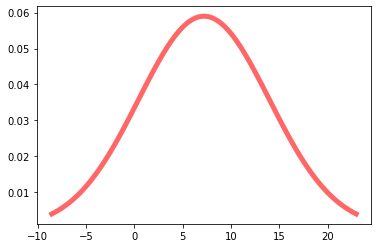

In [61]:
fig, ax = plt.subplots(1, 1)
prior_mean =7.2
prior_var = 2.6**2
prior = norm(loc = prior_mean, scale = prior_var)
(mean, var) = prior.stats(moments="mv")
print(f"Mean: {mean}, std: {np.sqrt(var)}")
x = np.linspace(prior.ppf(0.01),
                prior.ppf(0.99), 100)
ax.plot(x, prior.pdf(x),
       'r-', lw=5, alpha=0.6, label='prior distribtion pdf')
print(f"Probability of stock goes down is {prior.cdf(0)}")
print(f"Probability of stock goes up more then 8 dollars { 1-prior.cdf(8.0)}")

### Exercise 5.10 (Investing in stock with data) 

Continuing with Exercise 5.9, it’s reasonable to assume that the daily changes in FancyTech stock value are Normally distributed around an unknown mean of  μ with a known standard deviation of  $\sigma = 2$ dollars.

On a random sample of 4 days, you observe changes in stock value of -0.7, 1.2, 4.5, and -4 dollars.

Plot the corresponding likelihood function of  μ
 
Plot the prior pdf, likelihood function, and the posterior pdf for  μ

Use summarize_normal_normal() to calculate descriptive statistics for the prior and the posterior models.

Comment on how your understanding about  μ evolved from the prior (in the previous exercise) to the posterior based on the observed data.

What is the posterior probability that, on average, the stock price goes down? Hint: pnorm().

What is the posterior probability that, on average, your stock price goes up by more than 8 dollars per day?

mean of 4 observations: 0.25
Mean: 0.25, std: 1.0


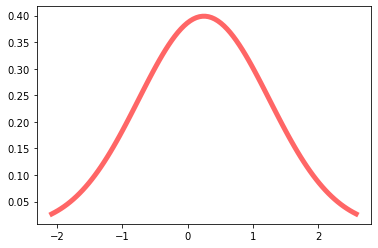

In [54]:
model_sig = 2
observations = [-0.7, 1.2,4.5, -4]
mean_obs = np.mean(observations)
n = len(observations)
print(f"mean of {n} observations: {mean_obs}")


# plot likelihood
fig, ax = plt.subplots(1, 1)
 
likelihood = norm(loc = mean_obs, scale = (model_sig**2)/n)
(mean, var) = likelihood.stats(moments="mv")
print(f"Mean: {mean}, std: {np.sqrt(var)}")
x = np.linspace(likelihood.ppf(0.01),
                likelihood.ppf(0.99), 100)
ax.plot(x,likelihood.pdf(x),
       'r-', lw=5, alpha=0.6, label='likelihood distribtion pdf')


In [59]:
model_sig**2

4

Mean: 1.1456185567010309, std: 0.8711340206185567
Probability of stock goes down is 0.09424003728277364
Probability of stock goes up more then 8 dollars 1.7763568394002505e-15


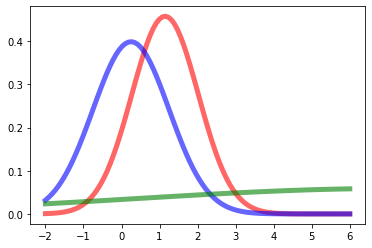

In [72]:
fig, ax = plt.subplots(1, 1)
post_mean = (prior_mean*model_sig**2 + mean_obs*n*prior_var)/(n*prior_var + model_sig**2) 
post_var = prior_var*model_sig**2/(n*prior_var + model_sig**2)
rv = norm(loc = post_mean, scale = post_var)
(mean, var) = rv.stats(moments="mv")
print(f"Mean: {mean}, std: {np.sqrt(var)}")
x = np.linspace(-2,
                6, 100)
ax.plot(x, rv.pdf(x),
       'r-', lw=5, alpha=0.6, label='post distribtion pdf')
ax.plot(x,likelihood.pdf(x),
       'b-', lw=5, alpha=0.6, label='likelyhood distribtion pdf')
ax.plot(x, prior.pdf(x),
       'g-', lw=5, alpha=0.6, label='prior distribtion pdf')
print(f"Probability of stock goes down is {rv.cdf(0)}")
print(f"Probability of stock goes up more then 8 dollars { 1-rv.cdf(8.0)}")

We note that we have a much narrower distribution for $\mu$ then our prior, and that the mean shifted down to about $1

### Exercise 5.14 
 To show that posterior simulation sucks, attempt Simulate the posterior of  μ
  for the following model upon observing a single data point  Y = 1.1:
 
 $$ Y|\mu \sim N(\mu, 1^2)\\
    \mu \sim N(0, 1^2) $$
    
 Note that we will rarely see exactly Y =1.1, but what if we gave it a windo dY = .005 for example. Lets try that

In [160]:
num_samples = 1000000
prior_mus = norm.rvs(size=num_samples)
 
sim_data= pd.DataFrame(data = {'mu' :prior_mus})
sim_data['Y']= norm.rvs(loc=sim_data['mu'])

In [161]:
sim_data.head(3)

,mu,Y
0,0.234516,0.451125
1,-0.287105,-0.499281
2,0.939947,1.088977


In [162]:
close_results = sim_data[np.abs(sim_data.Y - 1.1) < .005].reset_index(drop=True)
close_results.shape

(2086, 2)

<AxesSubplot:>

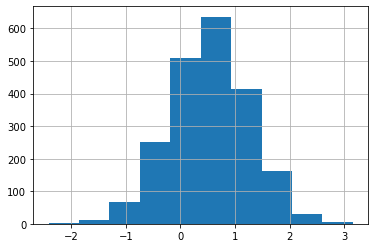

In [163]:
(close_results.mu).hist()

In [166]:
close_results.mu.describe()

count    2086.000000
mean        0.536403
std         0.724280
min        -2.414039
25%         0.046422
50%         0.539368
75%         1.019534
max         3.156815
Name: mu, dtype: float64

The true answer is:

Mean: 0.5, std:0.7071067811865476


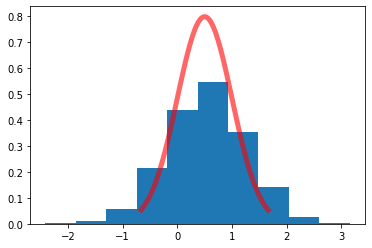

In [169]:
fig, ax = plt.subplots(1, 1)
mean = 1/2.0  # weighted result
var = 1/2.0 # 1*1/(1^2 + 1^2)
print(f"Mean: {mean}, std:{np.sqrt(var)}")
res = norm(loc = mean, scale =  var)
 
x = np.linspace(res.ppf(0.01),
                res.ppf(0.99), 100)
ax.plot(x, res.pdf(x), 'r-', lw=5, alpha=0.6)
ax.hist(close_results.mu, density = True);

I mean it works... just not terribly efficient. i got 2000 samples from 1 million to start with !